In [1]:
import os
import pandas as pd
from glob import glob
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.image import imread 
import seaborn as sns 
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D ,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [4]:
train_path = "./data/Expression/train/"
test_path  = "./data/Expression/test"

In [5]:
print(os.listdir(train_path))
folders=glob(test_path + '/*')

['angry', 'happy', 'neutral']


In [6]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\angry'):
    
    img = imread(test_path+'\\angry'+'\\'+image_filename)
    d1,d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\Users\Rajan\miniconda3\envs\gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


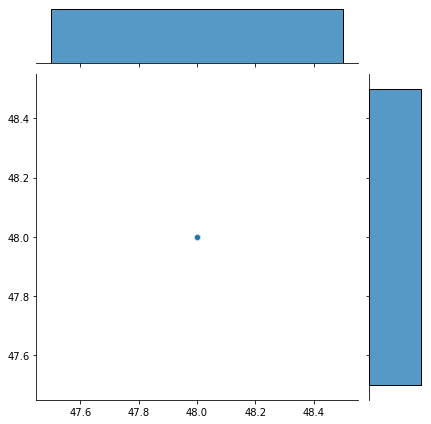

In [7]:
sns.jointplot(dim1,dim2)

In [8]:
image_shape = (int(np.mean(dim1)),int(np.mean(dim2)),1)
print(image_shape)

(48, 48, 1)


In [9]:
folders=glob(test_path + '/*')
print(f"Total category in dataset is:: {len(folders)}")

Total category in dataset is:: 3


In [10]:
traindata_gen=ImageDataGenerator(
                             rescale=1/255.,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             fill_mode='nearest'
                              )

testdata_gen=ImageDataGenerator(
                             
                             rescale=1/255.)


In [11]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = (48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(folders), activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [14]:
batch_size = 32
traning_set=traindata_gen.flow_from_directory(train_path,
                                              target_size =image_shape[:2],
                                                 batch_size = batch_size,
                                                 color_mode="grayscale",
                                                 class_mode = 'categorical')

testing_set=testdata_gen.flow_from_directory(test_path,
                                            target_size = image_shape[:2],
                                                 batch_size = batch_size,
                                                 color_mode="grayscale",
                                                 class_mode = 'categorical',
                                            shuffle=False)
# val_set = valdatagen.flow_from_directory(val_path,
#                                             target_size = image_shape[:2],
#                                                  batch_size = batch_size,
#                                                  color_mode="grayscale",
#                                                  class_mode = 'categorical',
#                                             shuffle=False )

Found 16175 images belonging to 3 classes.
Found 3965 images belonging to 3 classes.


In [15]:
testing_set.class_indices

{'angry': 0, 'happy': 1, 'neutral': 2}

In [16]:
result = model.fit(
  traning_set,
  epochs=50,
  validation_data=testing_set,
  callbacks=[early_stop]
    
)

Epoch 1/50
506/506 [==============================] - 27s 48ms/step - loss: 1.0485 - accuracy: 0.4589 - val_loss: 0.9050 - val_accuracy: 0.5801
Epoch 2/50
506/506 [==============================] - 17s 33ms/step - loss: 0.9166 - accuracy: 0.5670 - val_loss: 0.7401 - val_accuracy: 0.6613
Epoch 3/50
506/506 [==============================] - 17s 33ms/step - loss: 0.8009 - accuracy: 0.6386 - val_loss: 0.6546 - val_accuracy: 0.7158
Epoch 4/50
506/506 [==============================] - 16s 32ms/step - loss: 0.7293 - accuracy: 0.6790 - val_loss: 0.6288 - val_accuracy: 0.7294
Epoch 5/50
506/506 [==============================] - 16s 31ms/step - loss: 0.6887 - accuracy: 0.6994 - val_loss: 0.5869 - val_accuracy: 0.7538
Epoch 6/50
506/506 [==============================] - 16s 31ms/step - loss: 0.6661 - accuracy: 0.7118 - val_loss: 0.6037 - val_accuracy: 0.7420
Epoch 7/50
506/506 [==============================] - 15s 30ms/step - loss: 0.6442 - accuracy: 0.7227 - val_loss: 0.5616 - val_accuracy:

In [18]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (16.0, 10.0)
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer

def plot_accuracy(history):
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']
    plt.plot(training_accuracy,'r',linewidth=3.0)
    plt.plot(validation_accuracy,'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

def plot_loss(history):
  
  training_loss = history.history['loss']
  validation_loss = history.history['val_loss']
  plt.plot(training_loss,'m',linewidth=3.0)
  plt.plot(validation_loss,'c',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)
  plt.show()

    
        

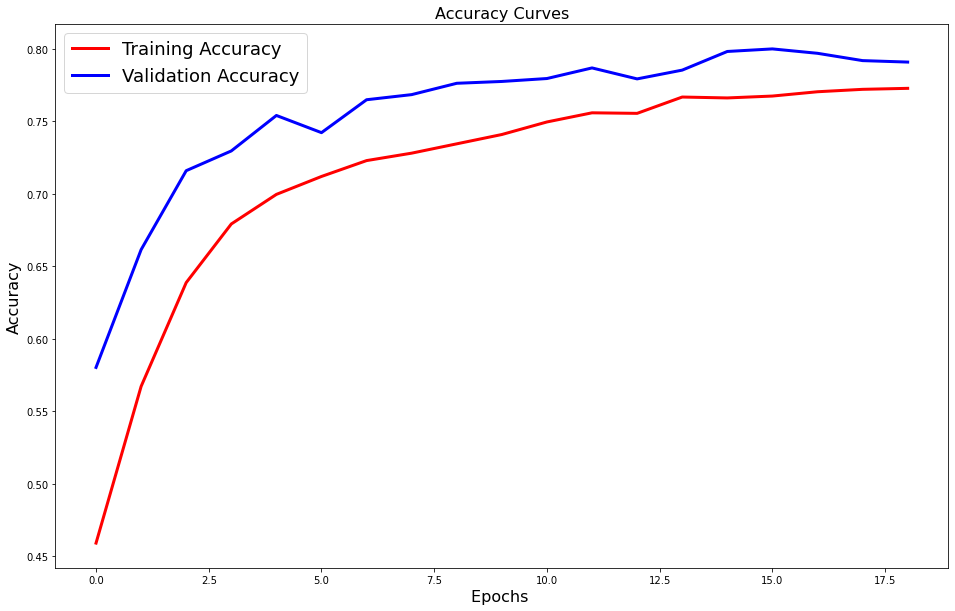

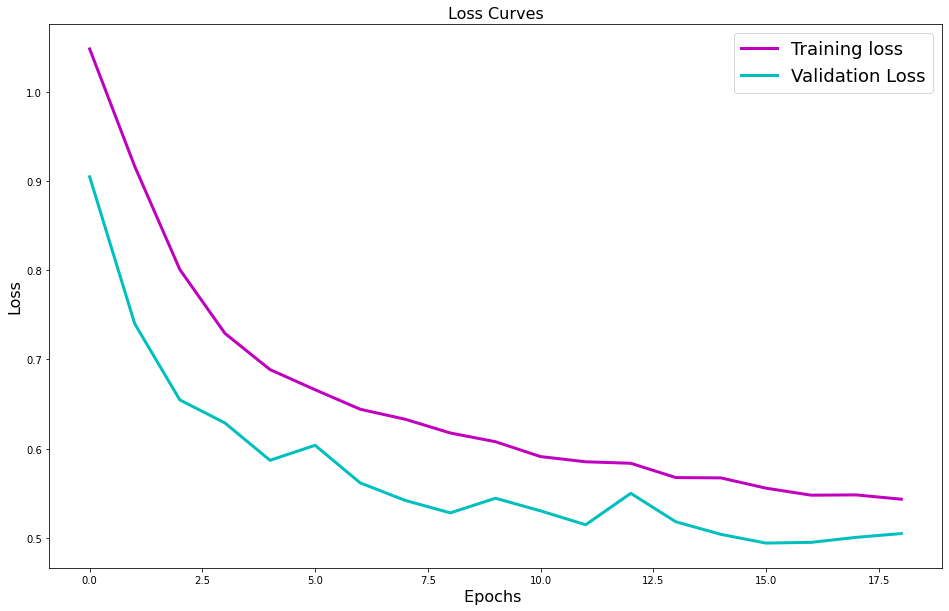

In [19]:
plot_accuracy(result)
plot_loss(result)

In [20]:
model.save(r'.\Model\threecalss.h5')